# Variable Types and Arrays #

In this notebook we will learn:
    
- About some of the different variable types
- How to convert between variable types (where possible)
- The basics of arrays
- Some array functions
- A little more about tables
- How to use the **arange** function to make an array

We will also see a few more graphs, some made from arrays and some made from tables.  


In [7]:
from datascience import *
import numpy as np

from datascience import *
import numpy as np
path_data = '../../../../../data/'
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())


## Review of Tables ##

In [2]:
skyscrapers = Table.read_table('skyscrapers.csv')
skyscrapers

name,material,city,height,completed
One World Trade Center,composite,New York City,541.3,2014
Willis Tower,steel,Chicago,442.14,1974
432 Park Avenue,concrete,New York City,425.5,2015
Trump International Hotel & Tower,concrete,Chicago,423.22,2009
Empire State Building,steel,New York City,381,1931
Bank of America Tower,composite,New York City,365.8,2009
Stratosphere Tower,concrete,Las Vegas,350.22,1996
Aon Center,steel,Chicago,346.26,1973
John Hancock Center,steel,Chicago,343.69,1969
WITI TV Tower,steel,Shorewood,329,1962


In [3]:
skyscrapers.select('name', 'height')

name,height
One World Trade Center,541.3
Willis Tower,442.14
432 Park Avenue,425.5
Trump International Hotel & Tower,423.22
Empire State Building,381
Bank of America Tower,365.8
Stratosphere Tower,350.22
Aon Center,346.26
John Hancock Center,343.69
WITI TV Tower,329


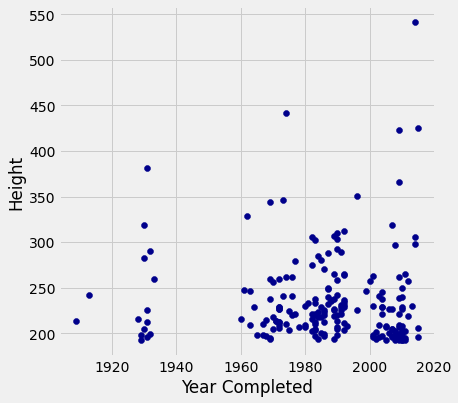

In [4]:
plots.figure(figsize=(6, 6))
plots.scatter(skyscrapers.column(4), 
              skyscrapers.column(3), 
              color='darkblue')
plots.xlabel('Year Completed')
plots.ylabel('Height');

In [5]:
skyscrapers.drop('completed', 'city', 'material')

name,height
One World Trade Center,541.3
Willis Tower,442.14
432 Park Avenue,425.5
Trump International Hotel & Tower,423.22
Empire State Building,381
Bank of America Tower,365.8
Stratosphere Tower,350.22
Aon Center,346.26
John Hancock Center,343.69
WITI TV Tower,329


In [6]:
skyscrapers

name,material,city,height,completed
One World Trade Center,composite,New York City,541.3,2014
Willis Tower,steel,Chicago,442.14,1974
432 Park Avenue,concrete,New York City,425.5,2015
Trump International Hotel & Tower,concrete,Chicago,423.22,2009
Empire State Building,steel,New York City,381,1931
Bank of America Tower,composite,New York City,365.8,2009
Stratosphere Tower,concrete,Las Vegas,350.22,1996
Aon Center,steel,Chicago,346.26,1973
John Hancock Center,steel,Chicago,343.69,1969
WITI TV Tower,steel,Shorewood,329,1962


In [7]:
skyscrapers.where('city', 'Los Angeles')

name,material,city,height,completed
U.S. Bank Tower,steel,Los Angeles,310.29,1990
Aon Center,steel,Los Angeles,261.52,1974
Two California Plaza,steel,Los Angeles,228.6,1992
Gas Company Tower,steel,Los Angeles,228.3,1991
Bank of America Plaza,steel,Los Angeles,224.03,1975
777 Tower,steel,Los Angeles,221,1991
Wells Fargo Tower,steel,Los Angeles,220.37,1983
Figueroa at Wilshire,steel,Los Angeles,218.54,1989
City National Tower,steel,Los Angeles,213.06,1971
Paul Hastings Tower,steel,Los Angeles,213.06,1971


In [8]:
skyscrapers.where('name', 'Empire State Building')

name,material,city,height,completed
Empire State Building,steel,New York City,381,1931


In [9]:
skyscrapers.where('city', 'New York City').sort('completed')

name,material,city,height,completed
Metropolitan Life Tower,steel,New York City,213.36,1909
Woolworth Building,steel,New York City,241.4,1913
Chanin Building,steel,New York City,197.8,1929
Mercantile Building,steel,New York City,192.6,1929
Chrysler Building,steel,New York City,318.9,1930
The Trump Building,steel,New York City,282.55,1930
One Grand Central Place,steel,New York City,205.13,1930
Empire State Building,steel,New York City,381,1931
Twenty Exchange,steel,New York City,225.86,1931
500 Fifth Avenue,steel,New York City,212.45,1931


In [10]:
skyscrapers.where('city', 'New York City').sort('completed', descending=True)

name,material,city,height,completed
432 Park Avenue,concrete,New York City,425.5,2015
Sky,concrete,New York City,206,2015
One World Trade Center,composite,New York City,541.3,2014
One57,steel/concrete,New York City,306.07,2014
4 World Trade Center,composite,New York City,297.73,2014
Courtyard & Residence Inn Manhattan/Central Park,concrete,New York City,229.62,2013
Eight Spruce Street,concrete,New York City,265.18,2011
1 MiMA Tower,concrete,New York City,194.55,2011
Goldman Sachs Headquarters,steel,New York City,228.3,2010
Langham Place,concrete,New York City,192.58,2010


In [11]:
chicago = skyscrapers.where('city', 'Chicago').drop('city')
chicago

name,material,height,completed
Willis Tower,steel,442.14,1974
Trump International Hotel & Tower,concrete,423.22,2009
Aon Center,steel,346.26,1973
John Hancock Center,steel,343.69,1969
The Franklin - North Tower,composite,306.94,1989
Two Prudential Plaza,concrete,303.28,1990
311 South Wacker Drive,concrete,292.92,1990
900 North Michigan Avenue,concrete/steel,265,1989
Water Tower Place,concrete,261.88,1976
Aqua,concrete,261.75,2009


In [12]:
chicago.where('material', 'steel').sort('completed', descending=True)

name,material,height,completed
Willis Tower,steel,442.14,1974
Aon Center,steel,346.26,1973
John Hancock Center,steel,343.69,1969
Chase Tower,steel,259.08,1969
Richard J. Daley Center,steel,197.51,1965


## Numbers ##

In Python, numbers can be integers or floats.  

If you start a calculation with all integers then from most operations, the result will be an integer.  The primary exception to this is division.  

If there is ONE float involved in a calculation, the result will be a float.  (Unless you use a special function to convert it back to an integer after the float has been used--we'll learn about those in a bit.)


In [13]:
4 * 5 

20

In [14]:
20  # int

20

In [15]:
20 / 3  # float

6.666666666666667

In [16]:
20 / 2  # also a float

10.0

In [17]:
1234 ** 5

2861381721051424

In [18]:
123456789 ** 1234

8501231189087579600089751361553790268770349244703297428875589625722666467029941104939346554618071090198338783086373718576302438541333303880149260355204961854660219348723703108817202816413695269234965947705916615090621461642947014634336709271250452147953400166273260278848909785635002746194627726905574383510586443855838501016194842546617466128367893005423946615632150875808229800489923121719324872322046242350358131209328011811786949525196068003065158218919856058009730366652388266762742312727811381080096679122681705212621121694449552467004319038040278415300031865815686537893832036302381576784433617023034776696420714876144485434646470579451349932122786555312581410798435527766468171805917233861943182867785949421920388024490545080852578054799518628169776648400272207657901368826628263954152902385783150069479202174698194137926647193941464878985158866033603990897827957922316614328503432155899763729601975377581454913801778657241584312797743187104615112990826170240576951377437889267043522178249238

In [19]:
4 / 700

0.005714285714285714

In [20]:
(4 / 700000000000000000)

5.714285714285714e-18

In [21]:
0.12345678901234567890123456789

0.12345678901234568

In [22]:
0.12345678901234567890123456789 - 0.1234567890123456789

0.0

In [23]:
10 ** 0.5

3.1622776601683795

In [24]:
16 ** 0.5

4.0

In [25]:
(10 ** 0.5) ** 2

10.000000000000002

In [26]:
20 / 9

2.2222222222222223

In [27]:
int(20 / 10)

2

In [28]:
int(20 / 9)

2

In [29]:
float(3)

3.0

In [30]:
6 / 4

1.5

In [31]:
6 / 4000

0.0015

In [32]:
6 / 400000000000000000000000000000000000000000000000000000000

1.5e-56

In [33]:
400000000000000000000000000000000000000000000000000000000 * 1.5e-56 

6.0

In [34]:
1.5e-56 

1.5e-56

In [35]:
x = 5

In [36]:
2x

SyntaxError: invalid syntax (<ipython-input-36-6d17da6697ca>, line 1)

In [37]:
2 * x

10

In [38]:
x = 3
y = "4"
z = "5.6"

int(y)



4

In [39]:
round(3.2)

3

In [40]:
round(2.00000052345324, 3)

2.0

In [41]:
10 * 3.0

30.0

## Strings ##

Strings are essentially text, are set off by either single or double quotes.  A string **can** contain or consist of a number.  

In [1]:
'99 bottles of rootbeer'

'99 bottles of rootbeer'

In [2]:
'99'

'99'

In [42]:
'baby yoda'

'baby yoda'

In [43]:
"baby yoda isn't yoda"

"baby yoda isn't yoda"

In [44]:
'She said "Hello"'

'She said "Hello"'

In [45]:
'baby yoda isn't yoda'

SyntaxError: invalid syntax (<ipython-input-45-43f471c7d14b>, line 1)

In [46]:
'straw' + 'berry' # concatenation

'strawberry'

In [47]:
3 + 'berry'

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [48]:
'straw' + ' ' + 'berry'

'straw berry'

In [49]:
'ha' * 10

'hahahahahahahahahaha'

In [50]:
'lo' * 5.5

TypeError: can't multiply sequence by non-int of type 'float'

## Functions to convert between types ##

The `int` and `float` commands will convert **into** these types. 

In [51]:
int('3')

3

In [52]:
int(3.98)

3

In [3]:
## int will do you only one favor at a time, 
## it will convert a string to an integer or a float to an integer but not both at once
## weird!

int('3.0')

ValueError: invalid literal for int() with base 10: '3.0'

In [4]:
float('3.0')

3.0

In [5]:
int(float('3.0'))

3

In [56]:
str(3)

'3'

In [57]:
str(4.5)

'4.5'

In [58]:
str(text)

NameError: name 'text' is not defined

Did you notice that `int(3.98)` returned 3, not 4.  If you want 3.98 to be *rounded* to 4, you need to use a different command.  One that would work is the `round` function found in `numpy`.   We imported `numpy` as `np`, so the command is `np.round`.

In [9]:
np.round(3.98)

4.0

In [10]:
int(np.round(3.98))

4

## Types ##

The `type` function will tell you what type of object Python considers something to be.  

In [59]:
type(10)

int

In [60]:
a = 10
type(a)

int

In [61]:
type(4.5)

float

In [62]:
type('abc')

str

In [63]:
type(skyscrapers)

datascience.tables.Table

In [64]:
type(True)

bool

In [65]:
type(abs)

builtin_function_or_method

In [66]:
type('three')

str

In [67]:
type(3)

int

## Arrays ##

Who wants to guess what the command `make_array` does?

In [68]:
my_array = make_array(1, 2, 3, 4)

In [69]:
my_array

array([1, 2, 3, 4], dtype=int64)

In [70]:
my_array * 2

array([2, 4, 6, 8], dtype=int64)

In [71]:
my_array ** 2

array([ 1,  4,  9, 16], dtype=int64)

In [72]:
my_array + 1

array([2, 3, 4, 5], dtype=int64)

In [73]:
my_array # array is unchanged

array([1, 2, 3, 4], dtype=int64)

In [74]:
another = make_array(60, 70, 80, 90)

In [75]:
my_array + another

array([61, 72, 83, 94], dtype=int64)

In [76]:
yet_another = make_array(5, 6, 7)

In [77]:
my_array + yet_another

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

### Function on Arrays ###

In [78]:
len(my_array)

4

In [79]:
sum(my_array)

10

In [80]:
sum(my_array)/len(my_array)

2.5

In [81]:
np.average(my_array)

2.5

In [82]:
another = make_array(60, 70, 80, 90)

In [83]:
len(yet_another)

3

In [84]:
tunas = make_array('bluefin', 'albacore', 'jim')
tunas

array(['bluefin', 'albacore', 'jim'], dtype='<U8')

In [85]:
sum(tunas)

TypeError: unsupported operand type(s) for +: 'int' and 'numpy.str_'

## Columns of Tables *are* Arrays ##

In [86]:
sf = skyscrapers.where('city', 'San Francisco')
sf

name,material,city,height,completed
Transamerica Pyramid,composite,San Francisco,260,1972
555 California Street,steel,San Francisco,237.44,1969
345 California Center,steel,San Francisco,211.84,1986
Millennium Tower,concrete,San Francisco,196.6,2009


In [87]:
sf.select('height')

height
260
237.44
211.84
196.6


In [88]:
sf.column('height')

array([260.        , 237.44000244, 211.83999634, 196.6000061 ])

In [89]:
sf.column(3)

array([260.        , 237.44000244, 211.83999634, 196.6000061 ])

In [90]:
np.average(sf.column('height'))

226.470001220705

In [91]:
la = skyscrapers.where('city', 'Los Angeles')
la

name,material,city,height,completed
U.S. Bank Tower,steel,Los Angeles,310.29,1990
Aon Center,steel,Los Angeles,261.52,1974
Two California Plaza,steel,Los Angeles,228.6,1992
Gas Company Tower,steel,Los Angeles,228.3,1991
Bank of America Plaza,steel,Los Angeles,224.03,1975
777 Tower,steel,Los Angeles,221,1991
Wells Fargo Tower,steel,Los Angeles,220.37,1983
Figueroa at Wilshire,steel,Los Angeles,218.54,1989
City National Tower,steel,Los Angeles,213.06,1971
Paul Hastings Tower,steel,Los Angeles,213.06,1971


In [92]:
np.average(la.column('height')) - np.average(sf.column('height'))

4.62545221501955

In [93]:
ny = skyscrapers.where('city', "New York City")
ny

name,material,city,height,completed
One World Trade Center,composite,New York City,541.3,2014
432 Park Avenue,concrete,New York City,425.5,2015
Empire State Building,steel,New York City,381,1931
Bank of America Tower,composite,New York City,365.8,2009
Chrysler Building,steel,New York City,318.9,1930
New York Times Tower,steel,New York City,318.77,2007
One57,steel/concrete,New York City,306.07,2014
4 World Trade Center,composite,New York City,297.73,2014
70 Pine,steel,New York City,290.17,1932
The Trump Building,steel,New York City,282.55,1930


In [94]:
np.average(ny.column('height')) - np.average(la.column('height'))

5.3156423794375485

In [95]:
notny = skyscrapers.where('city', are.not_equal_to("New York City"))
notny

name,material,city,height,completed
Willis Tower,steel,Chicago,442.14,1974
Trump International Hotel & Tower,concrete,Chicago,423.22,2009
Stratosphere Tower,concrete,Las Vegas,350.22,1996
Aon Center,steel,Chicago,346.26,1973
John Hancock Center,steel,Chicago,343.69,1969
WITI TV Tower,steel,Shorewood,329,1962
Bank of America Plaza,composite,Atlanta,311.8,1992
U.S. Bank Tower,steel,Los Angeles,310.29,1990
The Franklin - North Tower,composite,Chicago,306.94,1989
JPMorgan Chase Tower,composite,Houston,305.41,1982


In [96]:
onlyLAandNYC = skyscrapers.where('city', are.contained_in("Los Angeles New York City"))
onlyLAandNYC

name,material,city,height,completed
One World Trade Center,composite,New York City,541.3,2014
432 Park Avenue,concrete,New York City,425.5,2015
Empire State Building,steel,New York City,381,1931
Bank of America Tower,composite,New York City,365.8,2009
Chrysler Building,steel,New York City,318.9,1930
New York Times Tower,steel,New York City,318.77,2007
U.S. Bank Tower,steel,Los Angeles,310.29,1990
One57,steel/concrete,New York City,306.07,2014
4 World Trade Center,composite,New York City,297.73,2014
70 Pine,steel,New York City,290.17,1932


In [97]:
skyscrapers.where('city', are.not_contained_in("Los Angeles New York City"))

name,material,city,height,completed
Willis Tower,steel,Chicago,442.14,1974
Trump International Hotel & Tower,concrete,Chicago,423.22,2009
Stratosphere Tower,concrete,Las Vegas,350.22,1996
Aon Center,steel,Chicago,346.26,1973
John Hancock Center,steel,Chicago,343.69,1969
WITI TV Tower,steel,Shorewood,329,1962
Bank of America Plaza,composite,Atlanta,311.8,1992
The Franklin - North Tower,composite,Chicago,306.94,1989
JPMorgan Chase Tower,composite,Houston,305.41,1982
Two Prudential Plaza,concrete,Chicago,303.28,1990


In [98]:
len(ny.column(3))

73

## Seeing some other graphs ##

For now, let's not focus on how to make these graphs, although in the future we can all come back to these notebooks to look more closely at the code that generated them.  Instead, let's focus on reading and interpretting the graphs.  

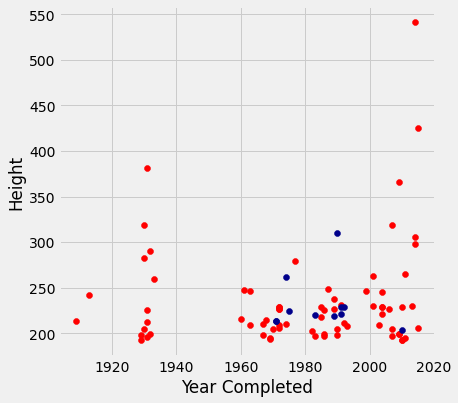

In [99]:
plots.figure(figsize=(6, 6))
plots.scatter(ny.column(4), 
              ny.column(3), 
              color='red')
plots.scatter(la.column(4), 
              la.column(3), 
              color='darkblue')
plots.xlabel('Year Completed')
plots.ylabel('Height');

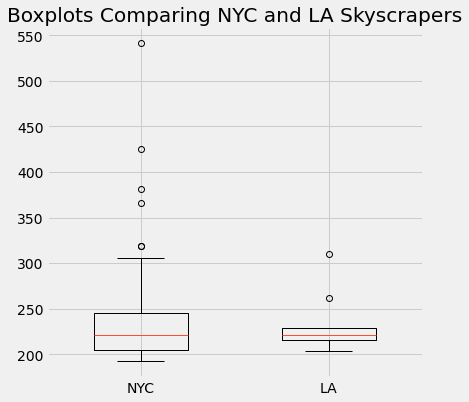

In [100]:
ticks=make_array(2.5, 3.5)
labels=make_array("NYC", "LA")

plots.figure(figsize=(6, 6))
plots.boxplot(ny.column(3), widths=.5, positions=make_array(ticks.item(0)) )
plots.boxplot(la.column(3), widths=.5, positions=make_array(ticks.item(1)) )
plots.xticks(ticks, labels)
plots.title("Boxplots Comparing NYC and LA Skyscrapers");

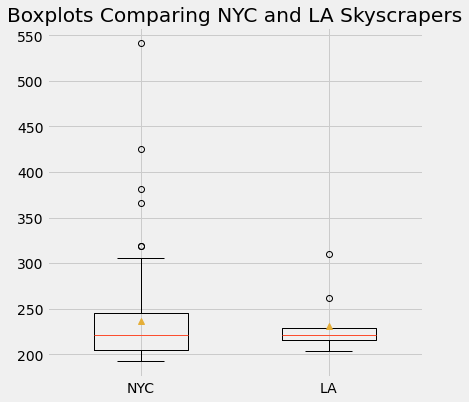

In [101]:
ticks=make_array(2.5, 3.5)
labels=make_array("NYC", "LA")

plots.figure(figsize=(6, 6))
plots.boxplot(ny.column(3), widths=.5, positions=make_array(ticks.item(0)), showmeans=True)
plots.boxplot(la.column(3), widths=.5, positions=make_array(ticks.item(1)), showmeans=True)
plots.xticks(ticks, labels)
plots.title("Boxplots Comparing NYC and LA Skyscrapers");

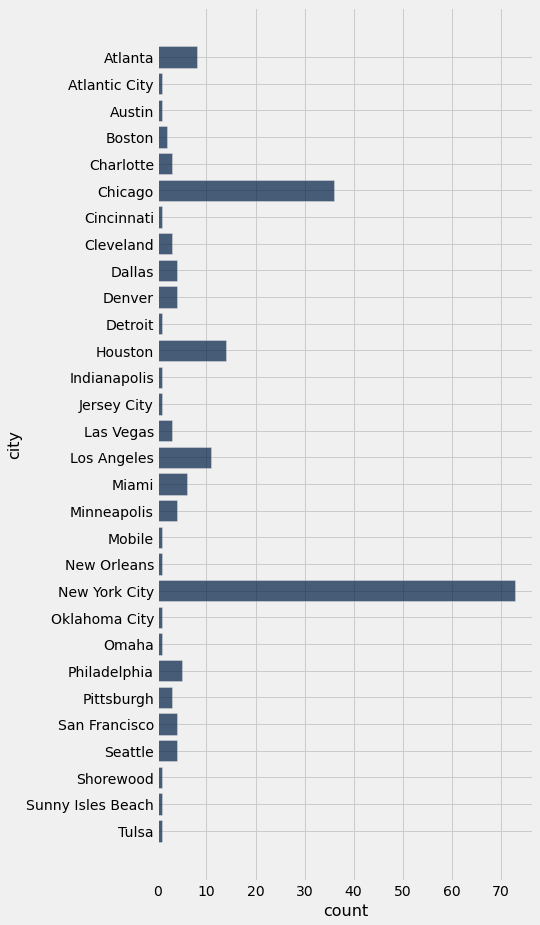

In [102]:
skyscrapers.group("city").barh('city')

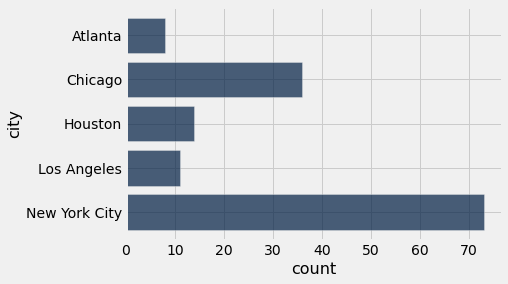

In [103]:
skyscrapers.group("city").where('count', are.above(7)).barh('city')

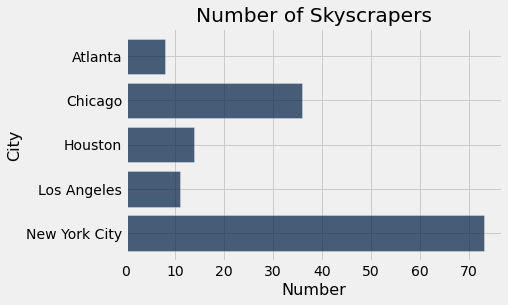

In [104]:
skyscrapers.group("city").where('count', are.above(7)).barh('city')
plots.title("Number of Skyscrapers")
plots.xlabel("Number")
plots.ylabel("City");

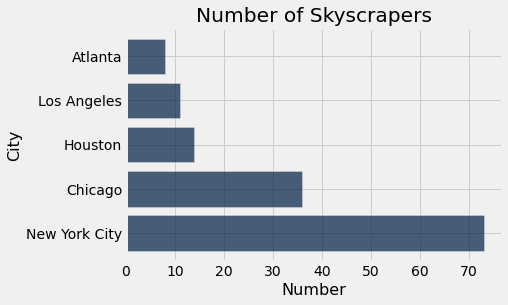

In [105]:
skyscrapers.group("city").where('count', are.above(7)).sort('count').barh('city')
plots.title("Number of Skyscrapers")
plots.xlabel("Number")
plots.ylabel("City");

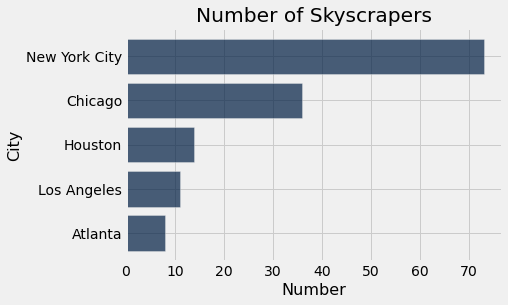

In [106]:
skyscrapers.group("city").where('count', are.above(7)).sort('count', descending=True).barh('city')
plots.title("Number of Skyscrapers")
plots.xlabel("Number")
plots.ylabel("City");

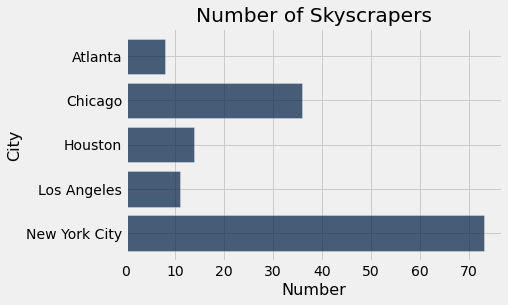

In [107]:
skyscrapers.group("city").where('count', are.above(7)).sort('city').barh('city')
plots.title("Number of Skyscrapers")
plots.xlabel("Number")
plots.ylabel("City");

## Ranges ##

In [108]:
make_array(0, 1, 2, 3, 4, 5, 6)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [109]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [110]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [111]:
np.arange(15, 7, -1)

array([15, 14, 13, 12, 11, 10,  9,  8])

In [112]:
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [113]:
np.arange(0, 21, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [114]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [115]:
a = np.arange(8)

In [116]:
a

array([0, 1, 2, 3, 4, 5, 6, 7])

In [117]:
a.item(7)

7